<a href="https://colab.research.google.com/github/lovecrushfamily/2021-CS109A/blob/master/docs/lectures/lecture17/notebook/overfitting_bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Title :
Regression with Bagging

## Description :
The aim of this exercise is to understand regression using Bagging.

<img src="https://github.com/lovecrushfamily/2021-CS109A/blob/master/docs/lectures/lecture17/fig/fig3.png?raw=1" style="width: 500px;">

## Instructions:

- Read the dataset `airquality.csv` as a Pandas dataframe.
- Take a quick look at the dataset.

- Split the data into train and test sets.
- Specify the number of bootstraps as 30 and a maximum depth of 3.
- Define a Bagging Regression model that uses Decision Tree as its base estimator.
- Fit the model on the train data.
- Use the helper code to predict using the mean model and individual estimators. The plot will look similar to the one given above.
- Predict on the test data using the first estimator and the mean model.
- Compute and display the test MSEs.

## Hints:

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html" target="_blank">sklearn.train_test_split()</a>
Split arrays or matrices into random train and test subsets.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html" target="_blank">BaggingRegressor()</a>
Returns a Bagging regressor instance.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html" target="_blank">DecisionTreeRegressor()</a>
A decision tree regressor.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor.fit" target="_blank">DecisionTreeRegressor.fit()</a>
Build a decision tree regressor from the training set (X, y).

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor.predict" target="_blank">DecisionTreeRegressor.predict()</a>
Build a decision tree regressor from the training set (X, y).

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html" target="_blank">DecisionTreeRegressor().estimators_ </a>
A list of estimators. Use this to access any of the estimators.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html" target="_blank">sklearn.mean_squared_error()</a>
Mean squared error regression loss.

In [1]:
# Import necessary libraries
import itertools
import numpy as np
import pandas as pd
from numpy import std
from numpy import mean
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline


In [3]:
# Read the dataset
df = pd.read_csv("https://raw.githubusercontent.com/lovecrushfamily/2021-CS109A/refs/heads/master/content/lectures/lecture17/data/airquality.csv",index_col=0)

# Take a quick look at the data
df.head(10)


,Ozone,Solar.R,Wind,Temp,Month,Day
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3
4,18.0,313.0,11.5,62,5,4
5,NaN,NaN,14.3,56,5,5
6,28.0,NaN,14.9,66,5,6
7,23.0,299.0,8.6,65,5,7
8,19.0,99.0,13.8,59,5,8
9,8.0,19.0,20.1,61,5,9
10,NaN,194.0,8.6,69,5,10


In [5]:
# Use the column Ozone to drop any NaNs from the dataframe
df = df[df.Ozone.notna()]


In [6]:
# Assign the values of Ozon column as the predictor variable
x = df[['Ozone']].values

# Use temperature as the response data
y = df['Temp']


In [7]:
# Split the data into train and test sets with train size as 0.8
# and set random_state as 102
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=102)


### Bagging Regressor

In [8]:
# Specify the number of bootstraps as 30
num_bootstraps = 30

# Specify the maximum depth of the decision tree as 3
max_depth = 3

# Define the Bagging Regressor Model
# Use Decision Tree as your base estimator with depth as mentioned in max_depth
# Initialise number of estimators using the num_bootstraps value
model = BaggingRegressor(max_samples=max_depth, n_estimators=num_bootstraps)


# Fit the model on the train data
model.fit(x_train,y_train)


BaggingRegressor(max_samples=3, n_estimators=30)

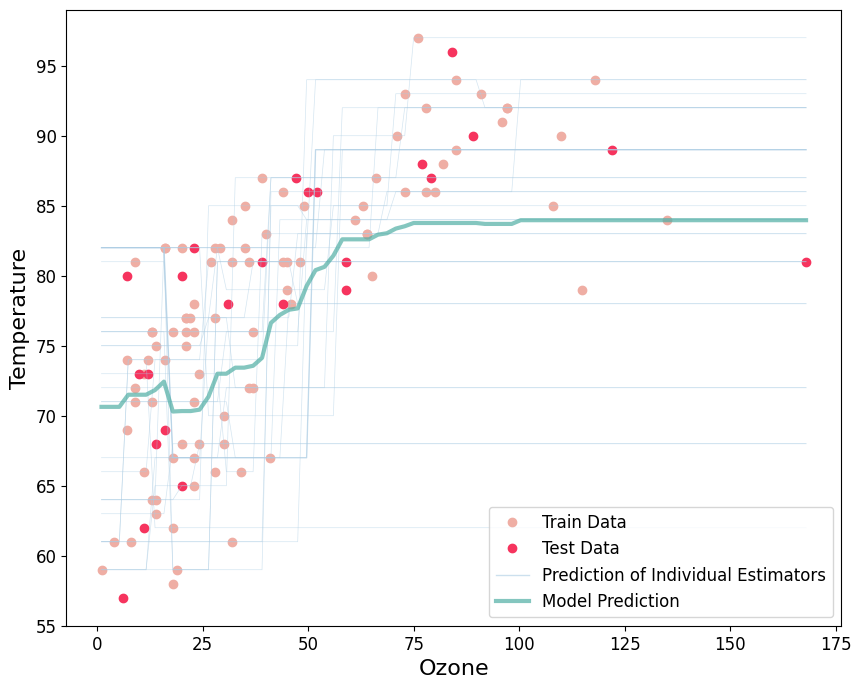

In [9]:
# Helper code to plot the predictions of individual estimators
plt.figure(figsize=(10,8))

xrange = np.linspace(x.min(),x.max(),80).reshape(-1,1)
plt.plot(x_train,y_train,'o',color='#EFAEA4', markersize=6, label="Train Data")
plt.plot(x_test,y_test,'o',color='#F6345E', markersize=6, label="Test Data")

plt.xlim()
for i in model.estimators_:
    y_pred1 = i.predict(xrange)
    plt.plot(xrange,y_pred1,alpha=0.5,linewidth=0.5,color = '#ABCCE3')
plt.plot(xrange,y_pred1,alpha=0.6,linewidth=1,color = '#ABCCE3',label="Prediction of Individual Estimators")


y_pred = model.predict(xrange)
plt.plot(xrange,y_pred,alpha=0.7,linewidth=3,color='#50AEA4', label='Model Prediction')
plt.xlabel("Ozone", fontsize=16)
plt.ylabel("Temperature", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='best',fontsize=12)
plt.show();


In [12]:
# Compute the test MSE of the prediction of every individual estimator
y_pred1 = model.estimators_[0].predict(x_test)

# Print the test MSE
print("The test MSE of one estimator in the model is", round(mean_squared_error(y_test,y_pred1),2))


The test MSE of one estimator in the model is 138.83


In [13]:
### edTest(test_mse) ###
# Compute the test MSE of the model prediction
y_pred = model.predict(x_test)

# Print the test MSE
print("The test MSE of the model is",round(mean_squared_error(y_test,y_pred),2))


The test MSE of the model is 48.52


This notebook demonstrates **Bagging Regression**.

The main concept is to understand how Bagging (Bootstrap Aggregating) improves regression predictions by combining the results of multiple individual decision tree estimators trained on different bootstrap samples of the training data.

Here's a summary of the main concepts covered:

1.  **Bagging:** The process of training multiple models (in this case, Decision Trees) on bootstrap samples of the training data.
2.  **Bootstrap Samples:** Random samples of the original dataset with replacement, used to train each individual estimator.
3.  **Decision Tree Regressor:** The base model used in this Bagging ensemble.
4.  **Ensemble Prediction:** The final prediction from the Bagging Regressor is typically the average of the predictions from all individual estimators.
5.  **Variance Reduction:** Bagging helps reduce the variance of the overall model by averaging the predictions of multiple models, which can lead to improved generalization performance compared to a single decision tree.
6.  **Comparing Individual and Ensemble Performance:** The notebook visualizes and calculates the MSE for both individual estimators and the combined Bagging model to illustrate the benefit of ensembling.

---

